# Metody Obliczeniowe w Nauce i Technice Laboratorium 5
## Równania nieliniowe
### Błażej Kustra

In [3]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")
from mpmath import *
import matplotlib.pyplot as plt
import numpy as np

### Funkcje do testów
1. $f_1(x)=cos(x)cosh(x)-1, [\frac{3}{2}\pi,2\pi]$
2. $f_2(x)=\frac{1}{x}-tg(x), (0,\frac{\pi}{2}]$
3. $f_3(x)=2^{-x}+e^x+2cos(x)-6, [1,3]$

In [4]:
function_1 = lambda x: cos(x) * cosh(x) - 1 
function_2 = lambda x: (1/x) - tan(x)
function_3 = lambda x: 2**(-x) + e**x + 2 * cos(x) - 6

### 1. Metoda bisekcji
Napisz funkcję realizującą metodę bisekcji dla danej funkcji f w oparciu o arytmetykę o zmiennej precyzji (mpmath.mpf). Funkcja przyjmuje następujące argumenty:
- Minimalną precyzję obliczeń (liczba cyfr znaczących) 
- Krańce przedziału
- Błąd bezwzględny obliczeń

Funkcja ma zwracać wyznaczone miejsce zerowe, wyliczoną wartość w miejscu zerowym oraz liczbę iteracji potrzebną do uzyskania określonej dokładności. Przetestuj działanie metody dla funkcji podanych na początku instrukcji. 

Jaka liczba iteracji jest potrzebna do uzyskania bezwzględnej dokładności rzędu: $10^{−7}, 10^{−15}, 10^{−33}$? 

Można pokazać, że uzyskanie bezwzględnej dokładności ε wymaga $n = \lceil {\frac{log \frac{b-a}{ε}}{log 2} }\rceil$ iteracji

In [109]:
def get_max_iteration(left, right, epsilon):
    product = log((right-left)/epsilon)
    divider = log(2)
    
    return int(ceil(product / divider))


def bisection(function, left, right, precision, epsilon, print_max_iteration = True):
    mp.dps = precision
    
    max_iteration = get_max_iteration(left, right, epsilon)
    if print_max_iteration: print("Metoda bisekcji, maksymalnie", max_iteration , "iteracji:")
    root = None
    iteration_count = 0
    
    if function(left) * function(right)<0:

        root = left 
        
        while (right - left) >= epsilon:
            
            iteration_count += 1                    
            if iteration_count > max_iteration: 
                return "Error, max iterations exceeded"
            
            print(iteration_count, end="\r")
            
            root = (right + left) / 2.0 
            
            if function(left)*function(root)<0: 
                right = root         
            elif function(root)*function(right)<0: 
                left = root          
            else:      
                break  

    elif function(left) == 0:
        root = left

    elif function(right) == 0:
        root = right
       
    if root is None:
        return None # Function do not have a root in the given range / or have more than one
    
    return root, function(root), iteration_count

#### Funkcja 1

Metoda bisekcji, maksymalnie 24 iteracji:
(mpf('4.730040789'), mpf('2.518296242e-6'), 24)

Metoda bisekcji, maksymalnie 51 iteracji:
(mpf('4.7300407448627046'), mpf('3.5749181392930041e-14'), 51)

Metoda bisekcji, maksymalnie 111 iteracji:
(mpf('4.73004074486270402602404810083388474'), mpf('-4.33334237487128066937595037081608647e-33'), 111)


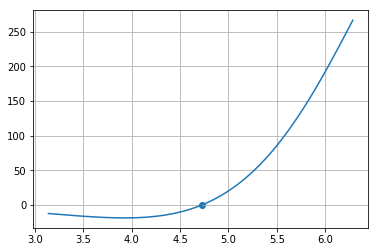

In [108]:
print(bisection(function_1, (3/2) * pi, 2 * pi, 7, mpf(1e-7)), end="\n\n")
print(bisection(function_1, (3/2) * pi, 2 * pi, 15, mpf(1e-15)), end="\n\n")
print(bisection(function_1, (3/2) * pi, 2 * pi, 33, mpf(1e-33)))


#### Funkcja 2

Metoda bisekcji, maksymalnie 24 iteracji:
(mpf('0.8603336066'), mpf('-7.450580597e-8'), 24)

Metoda bisekcji, maksymalnie 51 iteracji:
(mpf('0.86033358901938017'), mpf('-1.3322676295501878e-15'), 51)

Metoda bisekcji, maksymalnie 111 iteracji:
(mpf('0.860333589019379762483893424137662091'), mpf('9.62964972193617926527988971292463659e-34'), 111)


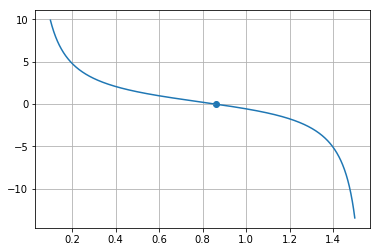

In [107]:
print(bisection(function_2, mpf(1e-7), pi / 2, 7, mpf(1e-7)), end="\n\n")
print(bisection(function_2, mpf(1e-15), pi / 2, 15, mpf(1e-15)), end="\n\n")
print(bisection(function_2, mpf(1e-33), pi / 2, 33, mpf(1e-33)))

xs = np.linspace(0.1, 1.5, 1000)
plt.plot(xs, (1/xs - np.sin(xs)/np.cos(xs)))
plt.scatter(0.86, 0)
plt.grid()
plt.show()

#### Funkcja 3

Metoda bisekcji, maksymalnie 25 iteracji:
(mpf('1.829383552'), mpf('-1.788139343e-7'), 25)

Metoda bisekcji, maksymalnie 51 iteracji:
(mpf('1.8293836019338494'), mpf('1.7763568394002505e-15'), 51)

Metoda bisekcji, maksymalnie 111 iteracji:
(mpf('1.829383601933848817136212946814151'), mpf('0.0'), 111)


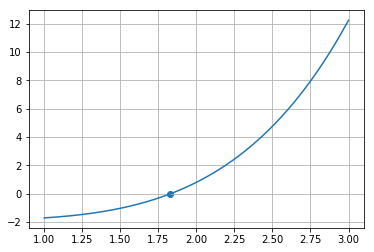

In [8]:
print(bisection(function_3, mpf(1), mpf(3),  7, mpf(1e-7)), end="\n\n")
print(bisection(function_3, mpf(1), mpf(3), 15, mpf(1e-15)), end="\n\n")
print(bisection(function_3, mpf(1), mpf(3), 33, mpf(1e-33)))

xs = np.linspace(1, 3 , 1000)
plt.plot(xs, (2**(-xs) + e**xs + 2 * np.cos(xs) - 6))
plt.scatter(1.83, 0)
plt.grid()
plt.show()

#### W jaki sposób możemy obliczyć k pierwszych dodatnich pierwiastków funkcji $f_1(x)$?

In [9]:
def get_all_roots(function, precision, epsilon, k):
    roots = []
    left = 0.1
    while len(roots) < k:
        root = bisection(function, left, left + 1, precision, epsilon, False)
        left += 1 # w przypadku funkcji 1 można spokojnie dodawać 1 i zawsze złapać w zakres tylko jedno m. zerowe

        if root is not None:
            roots.append(root[0])
            
    return roots

[4.730040744843427, 7.853204624110367, 10.995607837999705, 14.137165491201449, 17.278759657370394, 20.420352245646065]


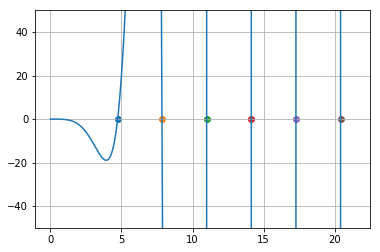

In [10]:
roots = get_all_roots(function_1, 10, mpf(1e-10), 6)
print(roots)

xs = np.linspace(0, roots[len(roots)-1]+1, 1000)
plt.plot(xs, (np.cos(xs) * np.cosh(xs) - 1))
plt.ylim(-50, 50)
for root in roots: plt.scatter(root, function_1(root))
plt.grid()
plt.show()

### 2. Metoda Newtona
Napisz funkcję realizującą metodę Newtona w oparciu o arytmetykę o zmiennej precyzji (mpmath.mpf). Funkcja ma wykorzystywać dwa kryteria stopu:
- maksymalną liczbę iteracji
- moduł różnicy kolejnych przybliżeń mniejszy od danej wartości ε

Oprócz przybliżonej wartości pierwiastka funkcja ma zwrócić liczbę iteracji potrzebną do uzyskania określonej dokładności ε. Przetestuj działanie metody dla funkcji podanych na początku instrukcji (dodatkowo dostępne pochodne tych funkcji). 

In [67]:
D_function_1 = lambda x: sinh(x) * cos(x) - sin(x) * cosh(x)
D_function_2 = lambda x: -1/(x**2) - 1/(cos(x)**2)
D_function_3 = lambda x: e**x - ln(2) * 2**(-x) - 2 * sin(x)

In [113]:
def newton(function, D_function, left, right, precision, epsilon, print_max_iteration = True):
    mp.dps = precision
    
    max_iteration = get_max_iteration(left, right, epsilon)
    if print_max_iteration: print("Metoda Newtona, maksymalnie", max_iteration , "iteracji:")
    
    x = left
        
    for i in range(max_iteration):
        fx = function(x)
        if abs(fx) < epsilon:
            return x, fx, i
        
        Dfx = D_function(x)
        if Dfx == 0:return "Error, zero derivative"
        
        x = x - fx/Dfx
        
    return "Error, max iterations exceeded"

#### Funkcja 1

Metoda Newtona, maksymalnie 24 iteracji:
(mpf('4.7300407439'), mpf('-5.2154064178e-8'), 3)

Metoda Newtona, maksymalnie 51 iteracji:
(mpf('4.7300407448627040247'), mpf('-7.7195194680967915701e-17'), 4)

Metoda Newtona, maksymalnie 111 iteracji:
(mpf('4.7300407448627040260240481008338848171'), mpf('-1.6174802267314676109649814752178100527e-34'), 5)


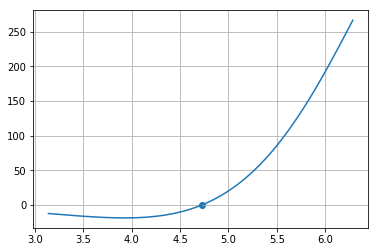

In [110]:
print(newton(function_1, D_function_1, (3/2) * pi, 2 * pi, 8, mpf(1e-7)), end="\n\n")
print(newton(function_1, D_function_1, (3/2) * pi, 2 * pi, 17, mpf(1e-15)), end="\n\n")
print(newton(function_1, D_function_1, (3/2) * pi, 2 * pi, 35, mpf(1e-33)))

xs = np.linspace(np.pi, 2 * np.pi, 1000)
plt.plot(xs, (np.cos(xs) * np.cosh(xs) - 1))
plt.scatter(4.73, 0)
plt.grid()
plt.show()

#### Funkcja 2

Metoda Newtona, maksymalnie 24 iteracji:
(mpf('0.86033358984'), mpf('-3.7252902985e-9'), 6)

Metoda Newtona, maksymalnie 51 iteracji:
(mpf('0.8603335890193797575'), mpf('2.775557561562891351e-17'), 7)

Metoda Newtona, maksymalnie 111 iteracji:
(mpf('0.86033358901937976248389342413766233283'), mpf('1.5046327690525280101999827676444744676e-36'), 8)


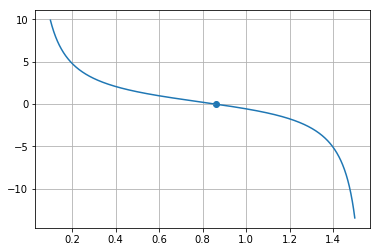

In [111]:
print(newton(function_2, D_function_2, mpf(0.1), pi / 2, 8, mpf(1e-7)), end="\n\n")
print(newton(function_2, D_function_2, mpf(0.1), pi / 2, 16, mpf(1e-15)), end="\n\n")
print(newton(function_2, D_function_2, mpf(0.1), pi / 2, 35, mpf(1e-33)))

xs = np.linspace(0.1, 1.5, 1000)
plt.plot(xs, (1/xs - np.sin(xs)/np.cos(xs)))
plt.scatter(0.86, 0)
plt.grid()
plt.show()

#### Funkcja 3

Metoda Newtona, maksymalnie 25 iteracji:
(mpf('1.8293836042'), mpf('7.4505805969e-9'), 7)

Metoda Newtona, maksymalnie 51 iteracji:
(mpf('1.82938360193384881754'), mpf('8.67361737988403547206e-19'), 8)

Metoda Newtona, maksymalnie 111 iteracji:
(mpf('1.829383601933848817136212946814150791371'), mpf('1.88079096131566001274997845955559308451e-37'), 9)


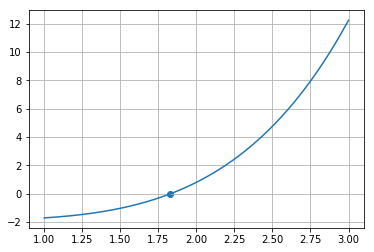

In [112]:
print(newton(function_3, D_function_3, mpf(1), mpf(3), 8, mpf(1e-7)), end="\n\n")
print(newton(function_3, D_function_3, mpf(1), mpf(3), 18, mpf(1e-15)), end="\n\n")
print(newton(function_3, D_function_3, mpf(1), mpf(3), 37, mpf(1e-33)))

xs = np.linspace(1, 3 , 1000)
plt.plot(xs, (2**(-xs) + e**xs + 2 * np.cos(xs) - 6))
plt.scatter(1.83, 0)
plt.grid()
plt.show()

#### Porównaj zbieżność metody ze zbieżnością uzyskaną dla metody bisekcji.

##### 7. miejsc znaczących

    Bisekcja: 1.829383 (552)
    Newton:   1.829383 (604)

##### 15. miejsc znaczących

    Bisekcja: 1.82938360193384 (94)
    Newton:   1.82938360193384 (88)

##### 33. miejsc znaczących

    Bisekcja: 1.82938360193384881713621294681415 (1)
    Newton:   1.82938360193384881713621294681415 (0)


Porównanłem działanie obu metod na funkcji $f_3(x)=2^{-x}+e^x+2cos(x)-6, [1,3]$

Wyniki dla podanych miejsc znaczących są dokładnie takie same, różnią s




### 3. Metoda siecznych
Napisz funkcję realizującą metodę siecznych w oparciu o arytmetykę o zmiennej precyzji (mpmath.mpf). Funkcja powinna stosować te same kryteria stopu co funkcja realizująca metodę Newtona. Przetestuj działanie metody dla funkcji podanych na początku instrukcji. Porównaj zbieżność metody ze zbieżnością uzyskaną dla metody bisekcji oraz metody Newtona.